In [1]:
from Binaries import *

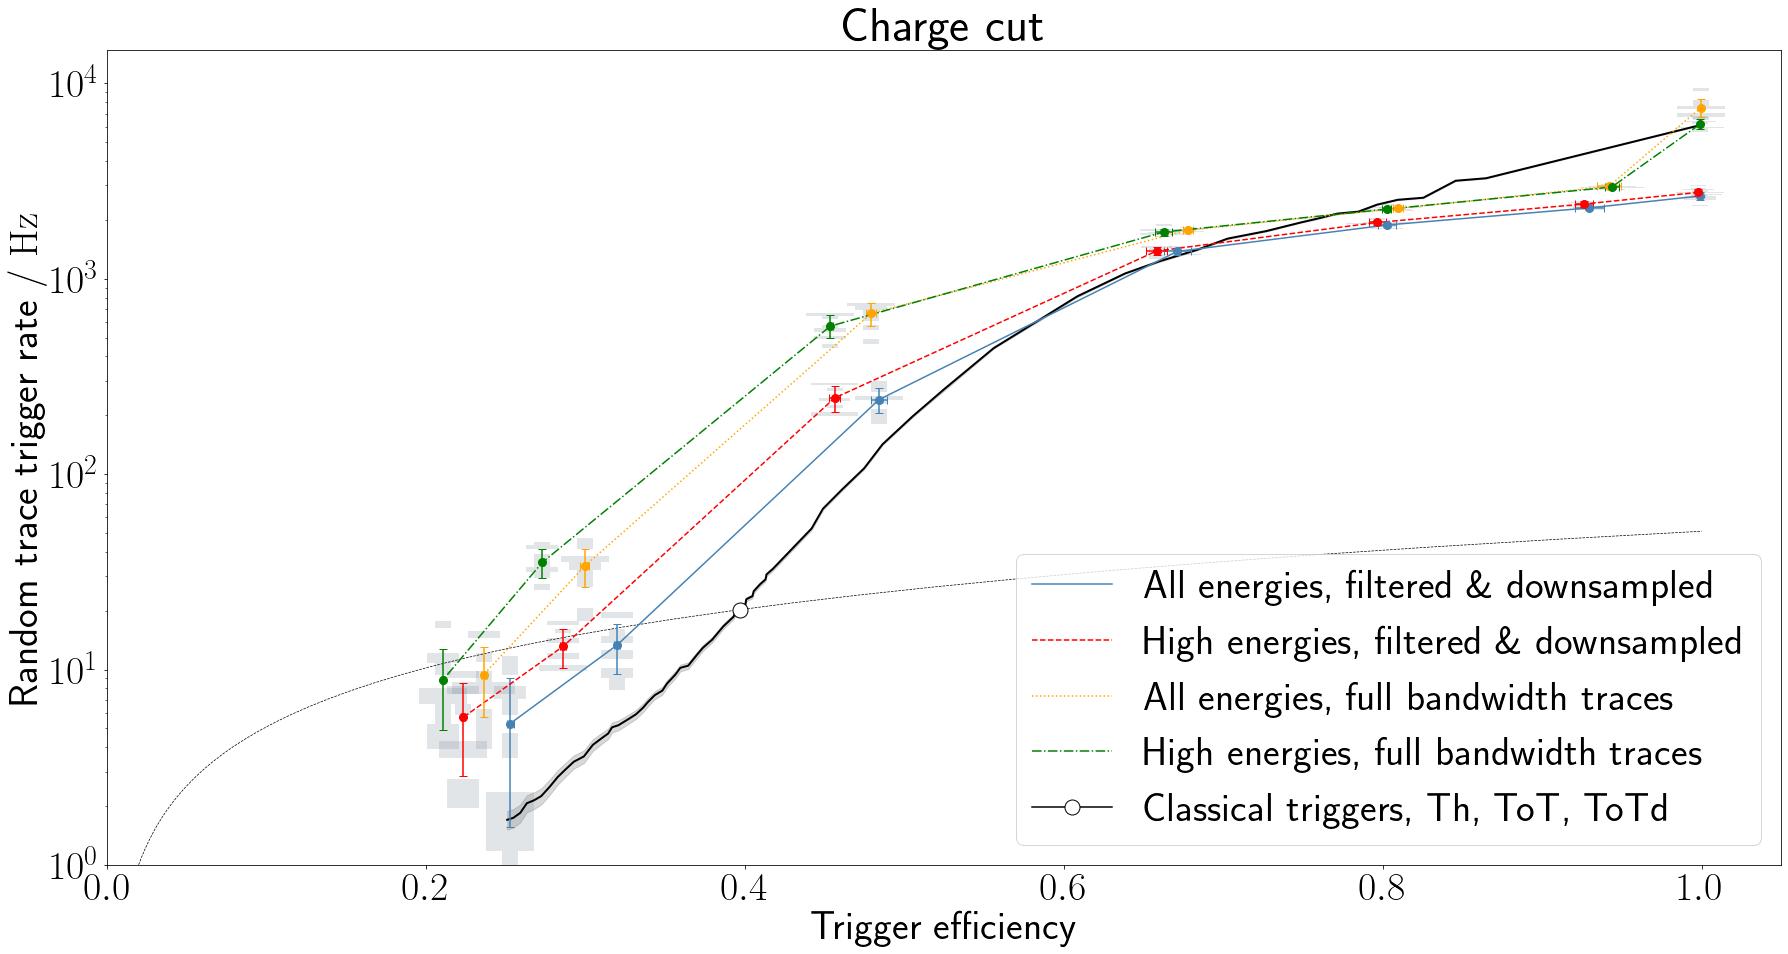

In [3]:
Plot = MoneyPlot("Charge cut")

Plot.add("120_TwoLayer_Downsampled_AllEnergies_NoCuts", "validation_data", color = "steelblue")
for i_ch in ["0_2", "0_5", "1_0", "2_0", "5_0", "8_0"]:
    Plot.add(f"120_TwoLayer_Downsampled_AllEnergies_{i_ch}VEM", "validation_data_no_cuts", color = "steelblue")
Plot.draw_line(color = "steelblue", label = "All energies, filtered \& downsampled")


Plot.add("120_TwoLayer_Downsampled_HighEnergies_NoCuts", "validation_data", color = "red")
for i_ch in ["0_2", "0_5", "1_0", "2_0", "5_0", "8_0"]:
    Plot.add(f"120_TwoLayer_Downsampled_HighEnergies_{i_ch}VEM", "all_energies_no_cuts", color = "red")
Plot.draw_line(color = "red", label = "High energies, filtered \& downsampled", ls = "--")


Plot.add("120_TwoLayer_FullBandwidth_AllEnergies_NoCuts", "validation_data", color = "orange")
for i_ch in ["0_2", "0_5", "1_0", "2_0", "5_0", "8_0"]:
    Plot.add(f"120_TwoLayer_FullBandwidth_AllEnergies_{i_ch}VEM", "validation_data_no_cuts", color = "orange")
Plot.draw_line(color = "orange", label = "All energies, full bandwidth traces", ls = ":")


Plot.add("120_TwoLayer_FullBandwidth_HighEnergies_NoCuts", "all_energies", color = "green")
for i_ch in ["0_2", "0_5", "1_0", "2_0", "5_0", "8_0"]:
    Plot.add(f"120_TwoLayer_FullBandwidth_HighEnergies_{i_ch}VEM", "all_energies_no_cuts", color = "green")
Plot.draw_line(color = "green", label = "High energies, full bandwidth traces", ls = "dashdot")

# Plot.add("120_LargeCNN_Downsampled_AllEnergies_NoCuts", "validation_data", color = "purple")
# for i_ch in ["0_2", "0_5", "1_0", "2_0", "5_0", "8_0"]:
#     Plot.add(f"120_LargeCNN_Downsampled_AllEnergies_{i_ch}VEM", "validation_data_no_cuts", color = "purple")
# Plot.draw_line(color = "purple", label = "Large CNN", ls = "solid")

Plot()

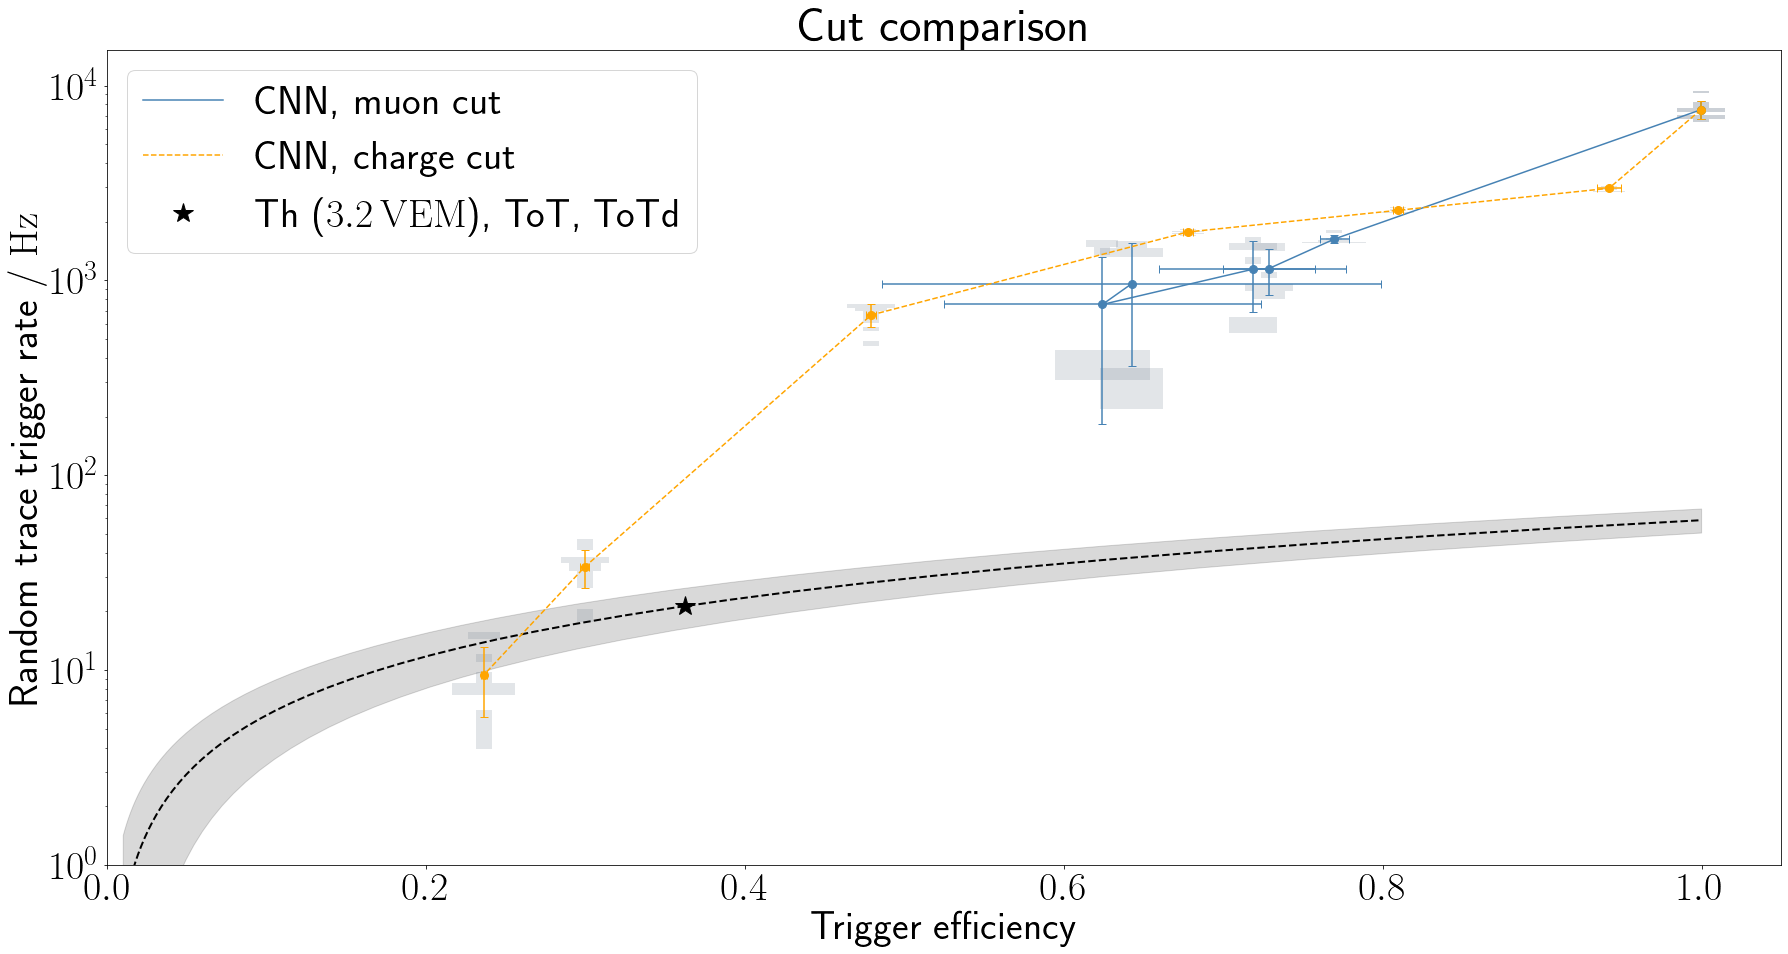

In [2]:
Plot = MoneyPlot("Cut comparison")

# Plot.add(AllEnergies, "validation_data")
Plot.add("120_TwoLayer_FullBandwidth_AllEnergies_NoCuts", "validation_data")

# 8 Muons NOT contained due to rate calculation not being finished yet
for i_muon in [1, 2, 4, 8, 16]:
    Plot.add(f"120_TwoLayer_FullBandwidth_AllEnergies_{i_muon}Muon", "validation_data_no_cuts", color = "steelblue")

Plot.draw_line(label = "CNN, muon cut", color = "steelblue")

Plot.add("120_TwoLayer_FullBandwidth_AllEnergies_NoCuts", "validation_data", color = "orange")

# 8 Muons NOT contained due to rate calculation not being finished yet
for i_charge in ["0_2", "0_5", "1_0", "2_0", "5_0", "8_0"]:
    Plot.add(f"120_TwoLayer_FullBandwidth_AllEnergies_{i_charge}VEM", "validation_data_no_cuts", color = "orange")

Plot.draw_line(label = "CNN, charge cut", color = "orange", ls = "--")

Plot()

# Charge cuts seem to behave better, maybe a hybrid cut could work?

In [8]:
root_path = "/cr/data01/filip/models/ENSEMBLES"

for dir in os.listdir(root_path):
    if "8Muon" in dir: continue
    for ensemble in os.listdir(os.path.join(root_path, dir)):
        name, no = ensemble.split("_")

        if len(no) != 2:
            no_padded = "0" + no

            print(f"mv {root_path}/{dir}/{name}_{no} {root_path}/{dir}/{name}_{no_padded}")
            os.system(f"mv {root_path}/{dir}/{name}_{no} {root_path}/{dir}/{name}_{no_padded}")

            # raise StopIteration

mv /cr/data01/filip/models/ENSEMBLES/120_TwoLayer_FullBandwidth_AllEnergies_1Muon/ensemble_2 /cr/data01/filip/models/ENSEMBLES/120_TwoLayer_FullBandwidth_AllEnergies_1Muon/ensemble_02
mv /cr/data01/filip/models/ENSEMBLES/120_TwoLayer_FullBandwidth_AllEnergies_1Muon/ensemble_8 /cr/data01/filip/models/ENSEMBLES/120_TwoLayer_FullBandwidth_AllEnergies_1Muon/ensemble_08
mv /cr/data01/filip/models/ENSEMBLES/120_TwoLayer_FullBandwidth_AllEnergies_1Muon/ensemble_6 /cr/data01/filip/models/ENSEMBLES/120_TwoLayer_FullBandwidth_AllEnergies_1Muon/ensemble_06
mv /cr/data01/filip/models/ENSEMBLES/120_TwoLayer_FullBandwidth_AllEnergies_1Muon/ensemble_7 /cr/data01/filip/models/ENSEMBLES/120_TwoLayer_FullBandwidth_AllEnergies_1Muon/ensemble_07
mv /cr/data01/filip/models/ENSEMBLES/120_TwoLayer_FullBandwidth_AllEnergies_1Muon/ensemble_9 /cr/data01/filip/models/ENSEMBLES/120_TwoLayer_FullBandwidth_AllEnergies_1Muon/ensemble_09
mv /cr/data01/filip/models/ENSEMBLES/120_TwoLayer_FullBandwidth_AllEnergies_1Muo

In [2]:
from Binaries import *

Trigger = HardwareClassifier()

Trigger.load_and_print_performance("final_th2_only")
Trigger.load_and_print_performance("final_tot_only")
Trigger.load_and_print_performance("final_totd_only")


Classifier                                    Dataset                                  TP      FP      TN      FN
HardwareClassifier                            final_th2_only                        50030       0       0  196022 -> ACC =  20.33%
HardwareClassifier                            final_tot_only                        99083       0       0  146969 -> ACC =  40.27%
HardwareClassifier                            final_totd_only                      100138       0       0  145914 -> ACC =  40.70%


FileNotFoundError: [Errno 2] No such file or directory: '/cr/data01/filip/models/HardwareClassifier/ROC_curve/final_mops_only/true_positives.csv'

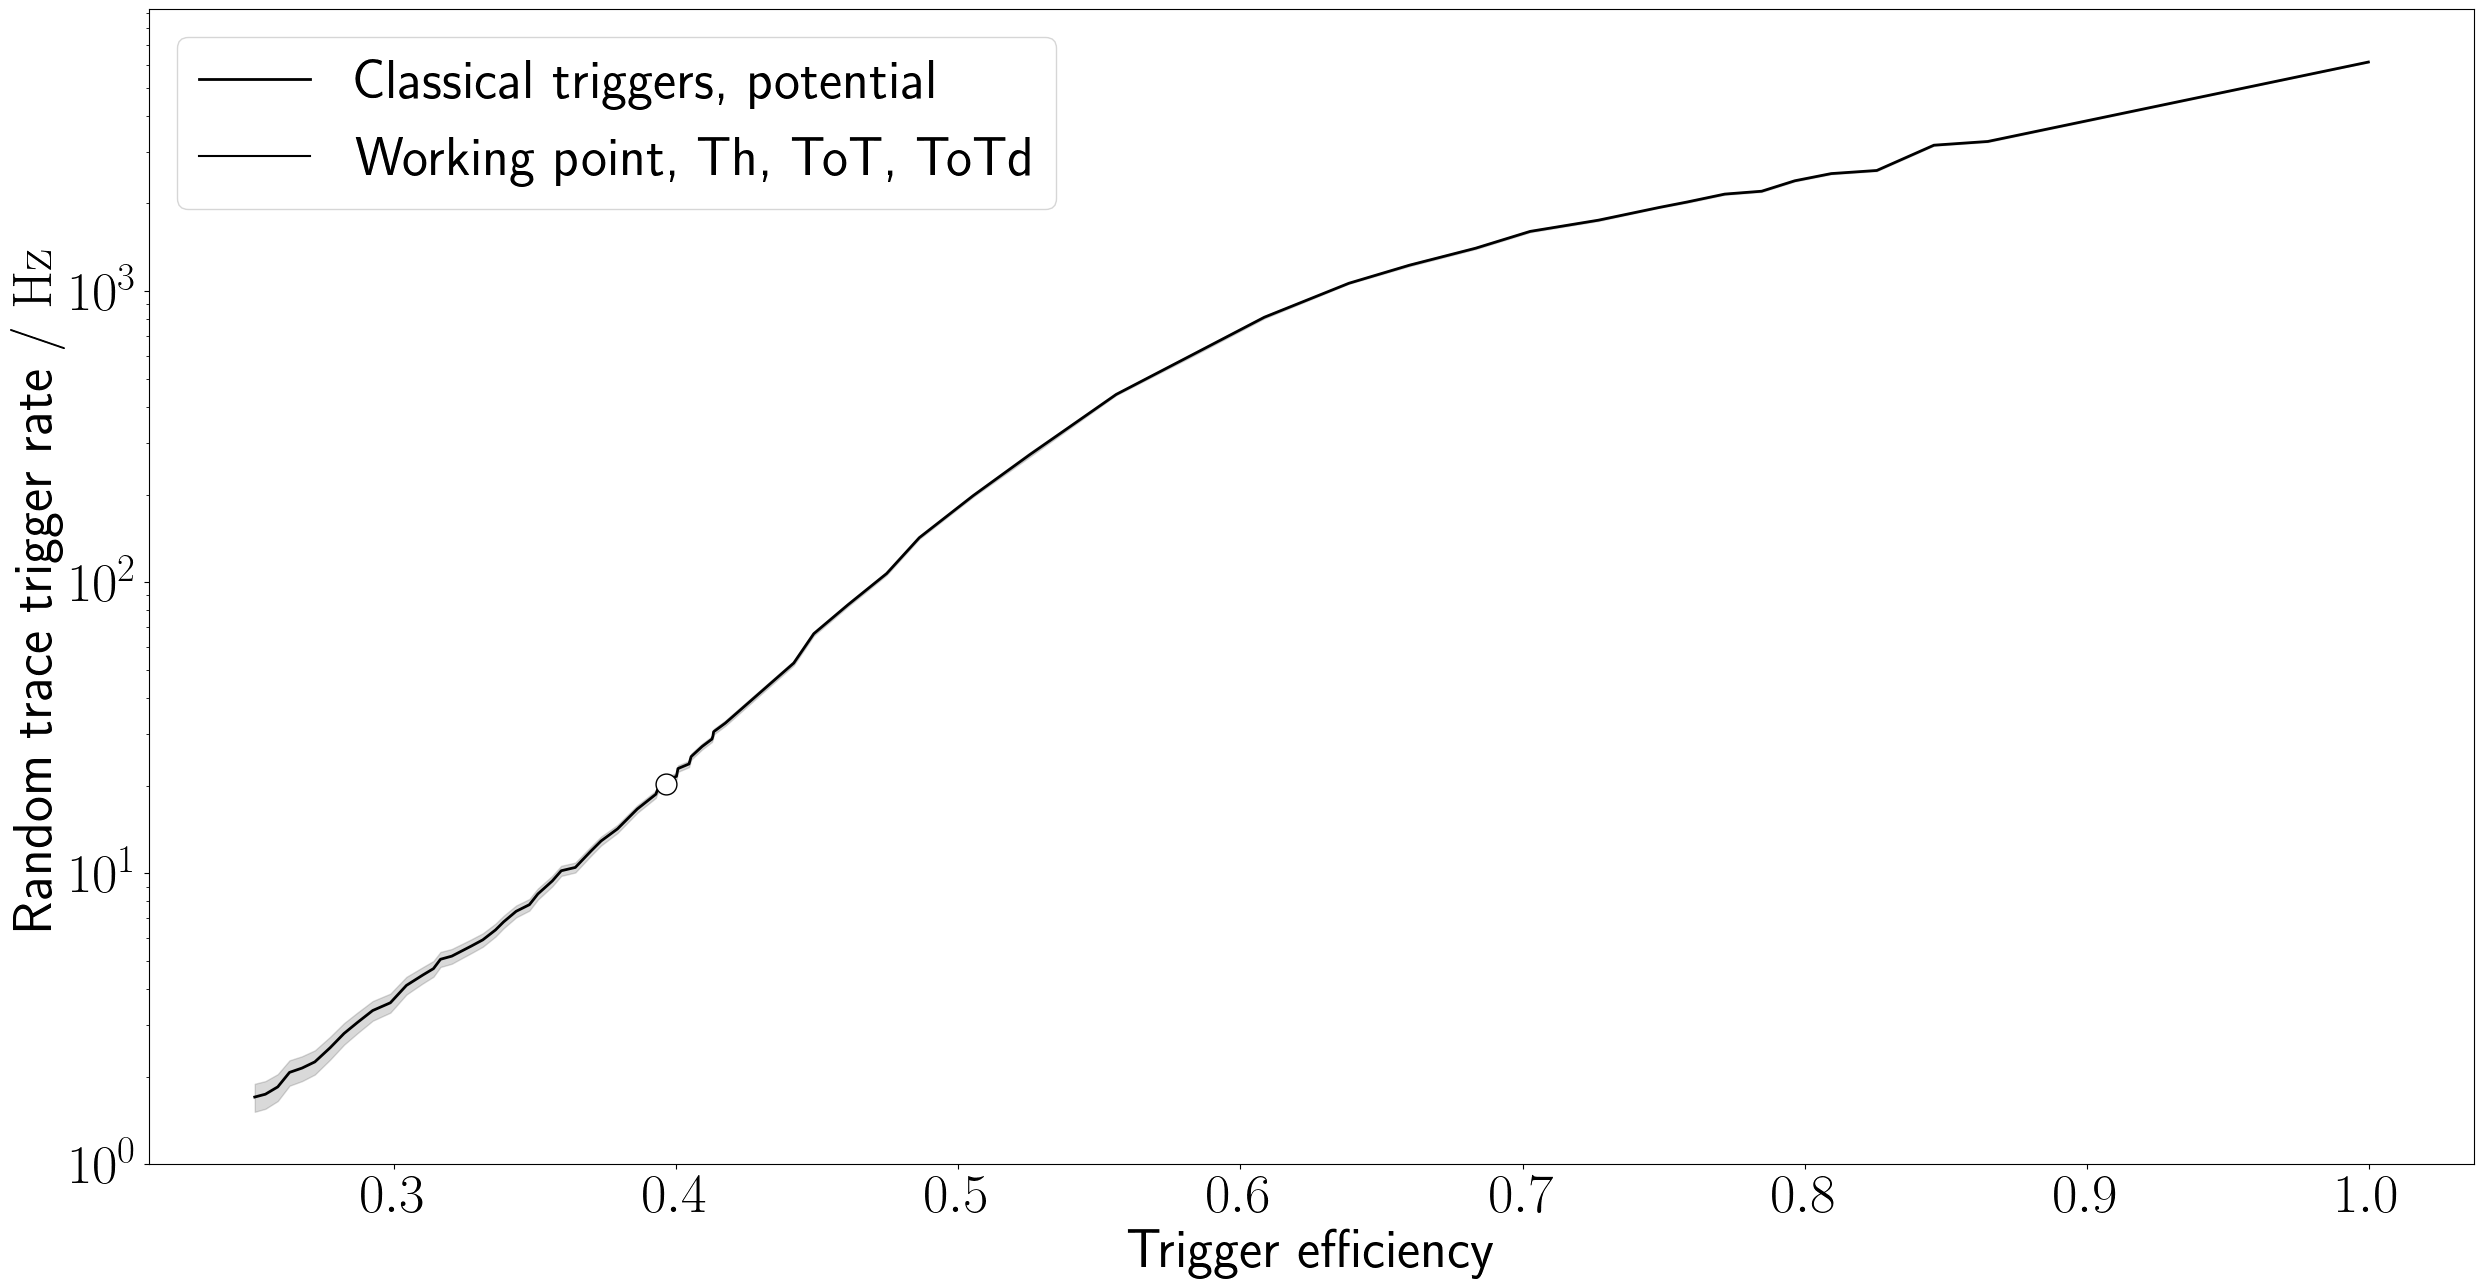

In [1]:
from Binaries import *

Plot = MoneyPlot("")
plt.plot([], [], c = "k", lw = 2, label = "Classical triggers, potential")
plt.errorbar([], [], c = "k", mfc = "w", markersize = 15, label = "Working point, Th, ToT, ToTd")
plt.ylabel("Random trace trigger rate / $\mathrm{Hz}$")
plt.xlabel("Trigger efficiency")
plt.legend()
